# Problem Statment 1: Delivery_time -> Predict delivery time using sorting time 

==============Steps to follow==============
EDA and data visualization
Correlation Analysis
Model Building
Model Testing
Model Prediction

============EDA(Data-Analysis/Cleaning) and data visualization================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as sts
import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler

In [2]:
delivtime_df = pd.read_csv('/Users/Akshay/Documents/DataScience/ExcelR/Assignments/DataScience/SimpleLinearRegression/delivery_time.csv')
delivtime_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivtime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delivtime_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
type(delivtime_df)

pandas.core.frame.DataFrame

In [6]:
delivtime_df = delivtime_df.rename({'Delivery Time': 'Delivery_Time','Sorting Time':'Sorting_Time'}, axis=1)
delivtime_df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
delivtime_df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivtime_df.median()

Delivery_Time    17.83
Sorting_Time      6.00
dtype: float64

In [9]:
delivtime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


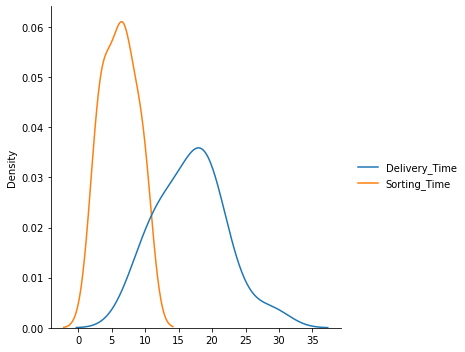

In [10]:
sns.displot(delivtime_df,kind='kde')# the data is nearly normally distributed so no need for transformation as mean and mode is nearly equal 

In [11]:
delivtime_df[delivtime_df.duplicated()]

,Delivery_Time,Sorting_Time


C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


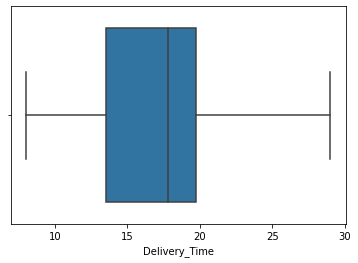

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time'>

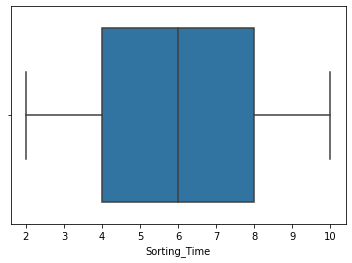

In [12]:
#Finding outliers by visualization using box plot
sns.boxplot(delivtime_df['Delivery_Time'])
plt.show()
sns.boxplot(delivtime_df['Sorting_Time'])


In [13]:
#Finding excat value of outliers
Q1 = delivtime_df.quantile(.25)
Q2 = delivtime_df.quantile(.75)
IQR = Q2-Q1
UE = Q2 + (1.5*IQR)
LE = Q1 - (1.5*IQR)
for value in delivtime_df.columns:
    print(delivtime_df[value][(delivtime_df[value] < LE[value]) | (delivtime_df[value] > UE[value])])

Series([], Name: Delivery_Time, dtype: float64)
Series([], Name: Sorting_Time, dtype: int64)


In [14]:
#Finding missing value by formula
delivtime_df[delivtime_df.isnull().any(axis=1)]

,Delivery_Time,Sorting_Time


<AxesSubplot:>

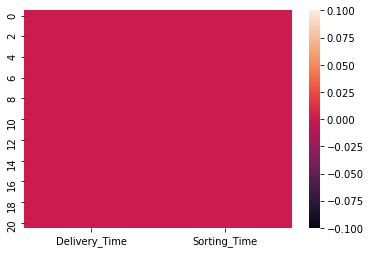

In [15]:
#Finding missing value by visualization
col = delivtime_df.columns
sns.heatmap(delivtime_df[col].isnull())# No misisng value

In [16]:
report = pp.ProfileReport(delivtime_df)
report.to_widgets()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

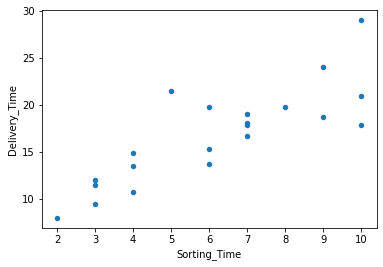

In [17]:
delivtime_df.plot(y='Delivery_Time',x = 'Sorting_Time',kind='scatter')
#positive linear association

=================Correlation Analysis===================

In [18]:
delivtime_df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:>

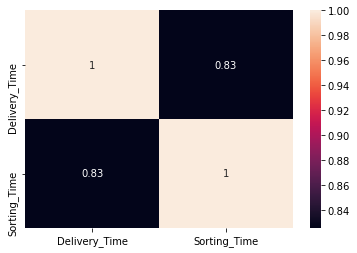

In [19]:
sns.heatmap(delivtime_df.corr(),annot=True)

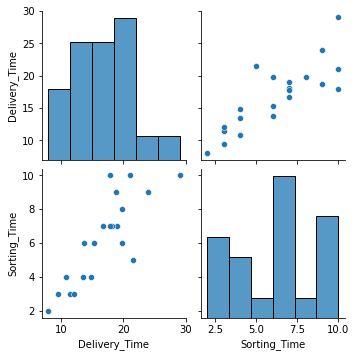

In [20]:
sns.pairplot(delivtime_df)#positive linear association i.e as x increase y increse

====================Model Building and Testing=====================

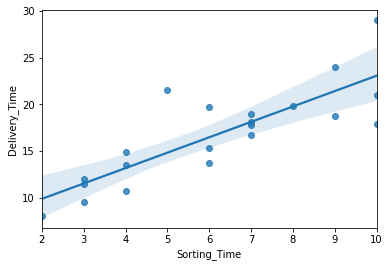

In [21]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=delivtime_df);

Text(0.5, 1.0, 'Log-Transformed Data')

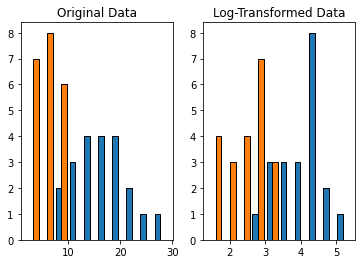

In [85]:
#A square root transformation can be useful for: Normalizing a skewed distribution.Transforming a non-linear relationship between 2 variables into a linear one. 
#Reducing heteroscedasticity of the residuals in linear regression.
data_log = np.sqrt(delivtime_df)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(delivtime_df, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [86]:
model = smf.ols("Delivery_Time~Sorting_Time",data_log).fit()#y=Delivery_Time,x=Sorting_Time
model

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           8.48e-07
Time:                        18:03:29   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [89]:
model.params

Intercept       1.613479
Sorting_Time    1.002217
dtype: float64

In [90]:
model.rsquared #since r2 is 0.7 model built is 72% accurate with the predicted value

0.7292011987544664

In [94]:
model.pvalues*100# the p value is less than 0.05 so it is significant i.e weightage of sortingTime is important and useful for prdicting delivery time

Intercept       0.018336
Sorting_Time    0.000085
dtype: float64

======================Model Prediction==================

In [28]:
#for Delivery_Time = 10
array = pd.Series([10])
df = pd.DataFrame(array,columns=['Sorting_Time'])
model.predict(df)

0    23.072933
dtype: float64

# Problem Statment 2: Salary_hike -> Build a prediction model for Salary_hike 

============EDA(Data-Analysis/Cleaning) and data visualization================

In [37]:
salary_df = pd.read_csv('/Users/Akshay/Documents/DataScience/ExcelR/Assignments/DataScience/SimpleLinearRegression/Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [39]:
salary_df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [40]:
type(salary_df)

pandas.core.frame.DataFrame

In [41]:
salary_df[salary_df.isnull().any(axis=1)]#no null value

,YearsExperience,Salary


In [42]:
salary_df = salary_df.rename({'YearsExperience': 'YearsOfExperience'},axis=1)
salary_df.head()

,YearsOfExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
salary_df.describe()

,YearsOfExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [44]:
salary_df.median()

YearsOfExperience        4.7
Salary               65237.0
dtype: float64

In [45]:
salary_df[salary_df.duplicated()]

,YearsOfExperience,Salary


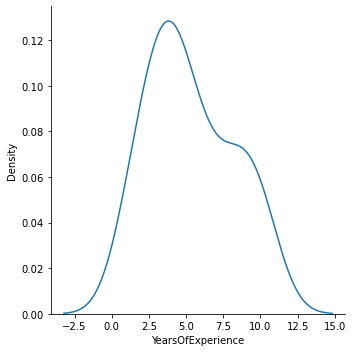

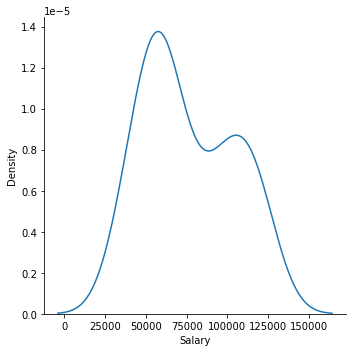

In [46]:
sns.displot(salary_df['YearsOfExperience'],kind='kde')
sns.displot(salary_df['Salary'],kind='kde')
#from the graph we can see that the data is not normally distributed and also from mean and mode are not equally

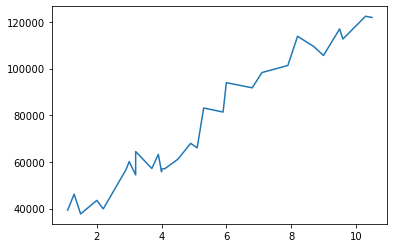

In [47]:
plt.plot('YearsOfExperience','Salary', data = salary_df)

<AxesSubplot:>

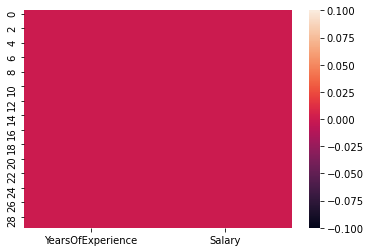

In [48]:
#Finding missing value by visualization
col = salary_df.columns
sns.heatmap(salary_df[col].isnull())

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


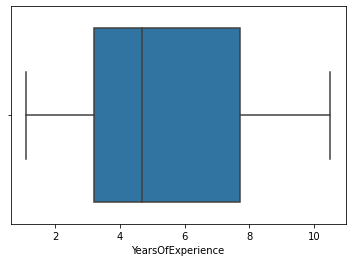

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

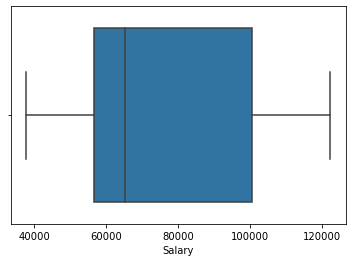

In [49]:
#Finding outlier

sns.boxplot(salary_df['YearsOfExperience'])
plt.show()
sns.boxplot(salary_df['Salary'])
#no outliers

#as the data has diffrent scaling unit we apply standardization to get std normally distributed data
#Calling class and fit algo
array = salary_df.values
ar1  =salary_df['Salary'].values.reshape(-1,1)
scalar = StandardScaler().fit(array)
scalar_y = StandardScaler().fit(ar1)
#calling transform algo
rescaled = scalar.transform(array)
np.set_printoptions(precision=2)
rescaled[:5,:]


Text(0.5, 1.0, 'Log-Transformed Data')

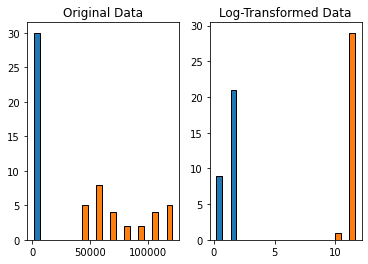

In [69]:
#Log transformation : It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. 
#In this transform, we take the log of the values in a column and use these values as the column instead.
rescaled = np.log(salary_df)
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(salary_df, edgecolor='black')
axs[1].hist(rescaled, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [70]:
new_salary_df=pd.DataFrame(rescaled,columns = ['YearsOfExperience','Salary'])
new_salary_df.head()
new_salary_df.info()
new_salary_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsOfExperience  30 non-null     float64
 1   Salary             30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Index(['YearsOfExperience', 'Salary'], dtype='object')

In [71]:
new_salary_df

,YearsOfExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


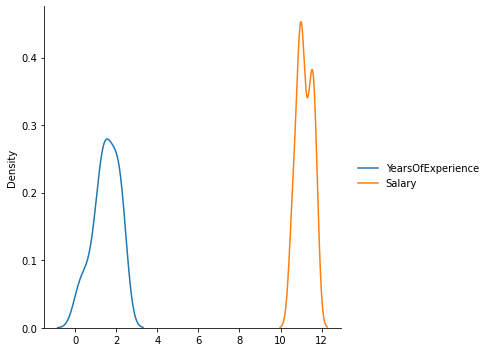

In [72]:
sns.displot(new_salary_df,kind='kde')

In [53]:
report = pp.ProfileReport(new_salary_df)
report.to_widgets()

===================Correlation Analysis======================

<AxesSubplot:xlabel='YearsOfExperience', ylabel='Salary'>

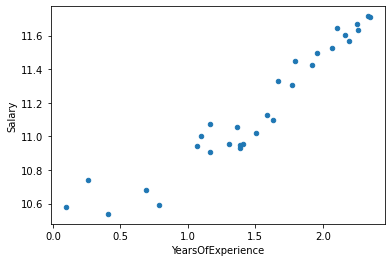

In [73]:
#scatter plot
new_salary_df.plot(kind='scatter',x='YearsOfExperience',y='Salary')


In [74]:
new_salary_df.corr()

,YearsOfExperience,Salary
YearsOfExperience,1.000000,0.951428
Salary,0.951428,1.000000


<AxesSubplot:>

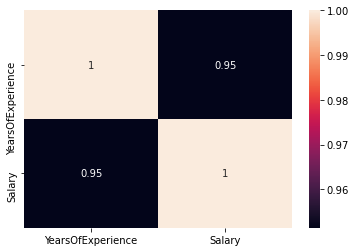

In [75]:
sns.heatmap(new_salary_df.corr(),annot=True)

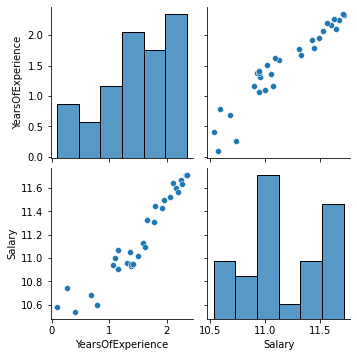

In [76]:
sns.pairplot(new_salary_df)

=====================Model Building and Testing=====================

<AxesSubplot:xlabel='YearsOfExperience', ylabel='Salary'>

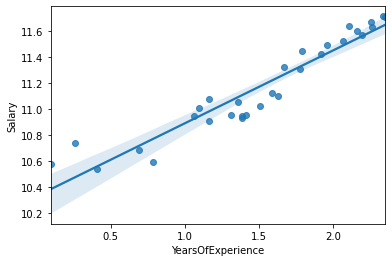

In [77]:
sns.regplot(x='YearsOfExperience',y='Salary',data=new_salary_df)

In [78]:
model = smf.ols('Salary~YearsOfExperience',data = new_salary_df).fit()
model

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           7.40e-16
Time:                        17:59:44   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.3280      0.056    184.868      0.000      10.214      10.442
YearsOfExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model.params

Intercept            10.328043
YearsOfExperience     0.562089
dtype: float64

In [81]:
print(model.pvalues,'\n\n',model.tvalues)#the p value is less than 0.05 so it is significant i.e weightage of YrOfExp is important and useful for prdicting Salary

Intercept            9.073132e-45
YearsOfExperience    7.395278e-16
dtype: float64 

 Intercept            184.867959
YearsOfExperience     16.352542
dtype: float64


In [82]:
model.rsquared# 90% of accurancy for the coefficint determination for the model built that it predicts response varibale with 95% accuracy

0.9052150725817149

====================Model Prediction========================

In [83]:
new_array = pd.Series([20])
df = pd.DataFrame(new_array,columns=['YearsOfExperience'])
predictSal = model.predict(df)
predictSal

0    21.56982
dtype: float64

In [84]:
#yoeList = salary_df.YearsOfExperience
predSalList = model.predict(new_salary_df)
scaledBackSalary = scalar_y.inverse_transform(predSalList)
actualSalList = salary_df.Salary
salList = {'Actual_Sal':actualSalList,'Predicted_Sal':scaledBackSalary}
salComp = pd.DataFrame(salList)
salComp


,Actual_Sal,Predicted_Sal
0,39343.0,355825.445880
1,46205.0,358356.373035
2,37731.0,360524.400304
3,43525.0,364882.883191
4,39891.0,366326.865376
5,56642.0,370512.199568
6,60150.0,371025.819800
7,54445.0,372003.600715
8,64445.0,372003.600715
9,57189.0,374203.158372
